# Part I - (Dataset Exploration Title)
## by (Kevin Shyaka)

## Introduction
> Introduce the dataset

This dataset includes 113,937 loans, each with 81 variables such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many more.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('../Data/prosperLoanData.csv')

In [3]:
#### first columns of the data 
pd.set_option('display.max_columns', None)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
df.nunique().sort_values(ascending=False).head(20)

ListingKey                      113066
LoanNumber                      113066
LoanKey                         113066
ListingNumber                   113066
ListingCreationDate             113064
DateCreditPulled                112992
MemberKey                        90831
LP_InterestandFees               78751
LP_CustomerPayments              78523
LP_CustomerPrincipalPayments     49828
RevolvingCreditBalance           38555
AvailableBankcardCredit          31829
MonthlyLoanPayment               23567
LP_ServiceFees                   19813
LP_GrossPrincipalLoss            15848
LP_NetPrincipalLoss              15709
ProsperPrincipalOutstanding      13875
StatedMonthlyIncome              13502
FirstRecordedCreditLine          11585
AmountDelinquent                  7059
dtype: int64

In [5]:
#choose the columns of interest 
used_cols = ['ListingCreationDate','Term', 'LoanStatus', 'BorrowerAPR','BorrowerRate', 'ProsperRating (Alpha)','ProsperScore', 'ListingCategory (numeric)','BorrowerState','EmploymentStatus',
    'IsBorrowerHomeowner','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors']
df_used_cols = df[used_cols]

In [6]:
df_used_cols.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000,112947.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,5.950067,2.774209,4.154984,5.608026e+03,1.421100,8337.01385,0.048027,80.475228
std,10.436212,0.080364,0.074818,2.376501,3.996797,10.160216,7.478497e+03,0.764042,6245.80058,0.332353,103.239020
min,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,4.000000,1.000000,0.000000,3.200333e+03,1.000000,4000.00000,0.000000,2.000000
50%,36.000000,0.209760,0.184000,6.000000,1.000000,0.000000,4.666667e+03,1.000000,6500.00000,0.000000,44.000000
75%,36.000000,0.283810,0.250000,8.000000,3.000000,3.000000,6.825000e+03,2.000000,12000.00000,0.000000,115.000000
max,60.000000,0.512290,0.497500,11.000000,20.000000,99.000000,1.750003e+06,8.000000,35000.00000,39.000000,1189.000000


In [7]:
#checking dataset information
df_used_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (Alpha)      84853 non-null   object 
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   BorrowerState              108422 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  DelinquenciesLast7Years    112947 non-null  float64
 12  StatedMonthlyIncome        113937 non-null  float64
 13  TotalProsperLoans          22

In [8]:
#checking dataset null values
df_used_cols.isna().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
EmploymentStatus              2255
IsBorrowerHomeowner              0
DelinquenciesLast7Years        990
StatedMonthlyIncome              0
TotalProsperLoans            91852
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

### What is the structure of your dataset?

> Dataset is a structured csv file 

### What is/are the main feature(s) of interest in your dataset?

> main features of interest have been selected in the cells above 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


### quantititave variables  

What are the distribution of float variables?

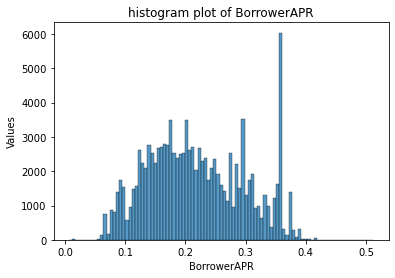

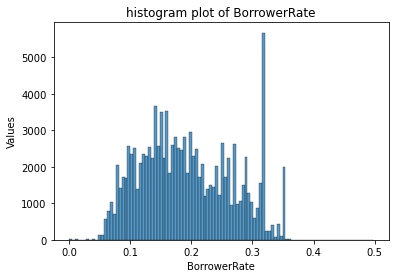

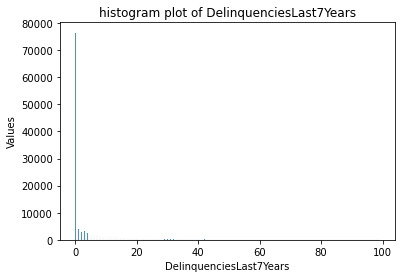

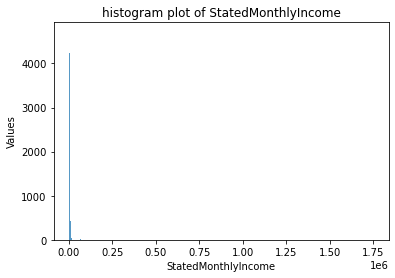

In [34]:
def histogram(df:pd.DataFrame,cols,**kwargs)->pd.DataFrame:
    """
    -- plot distribution for quantitative columns 
    """
    sb.histplot(data=df,x=cols,**kwargs);
    plt.xlabel(cols)
    plt.ylabel('Values')
    plt.title(f'histogram plot of {cols}')
    plt.show()
    
float_columns = df_used_cols.loc[:, df_used_cols.dtypes == float].columns.tolist()

for i in float_columns:
    histogram(df_used_cols,i)

it can be seen that the first two features seems to be the same, while there are some features which seems not to be nominal data such as properscore and total ProsperLoans. Additionally, features like deliquencienslast7 years and statedmonthlyincome seems to be left skewed but not clear, we can change bins 

In [10]:
#### investing more on propescore and total prosperLoans columns 
df_used_cols[['ProsperScore','TotalProsperLoans']].nunique()

ProsperScore         11
TotalProsperLoans     9
dtype: int64

According to the visualization above and metadata provided, those two columns have the wrong data type. ProsperScore should be categorical and TotalProsperLoans be integer type. Therefore, they shouldn't appear in visualizations above 

In [39]:
####changing the type of columns
df_used_cols['ProsperScore'] = df_used_cols['ProsperScore'].astype('category')
df_used_cols['TotalProsperLoans'] = df_used_cols['TotalProsperLoans'].fillna(0).astype('int64')
df_used_cols['ListingCreationDate'] = pd.to_datetime(df_used_cols['ListingCreationDate'])
df_used_cols['LoanOriginationDate'] = pd.to_datetime(df_used_cols['LoanOriginationDate'])


In [40]:
###test
df_used_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  object        
 3   BorrowerAPR                113912 non-null  float64       
 4   BorrowerRate               113937 non-null  float64       
 5   ProsperRating (Alpha)      84853 non-null   object        
 6   ProsperScore               84853 non-null   category      
 7   ListingCategory (numeric)  113937 non-null  int64         
 8   BorrowerState              108422 non-null  object        
 9   EmploymentStatus           111682 non-null  object        
 10  IsBorrowerHomeowner        113937 non-null  bool          
 11  DelinquenciesLast7Years    112947 non-null  float64 

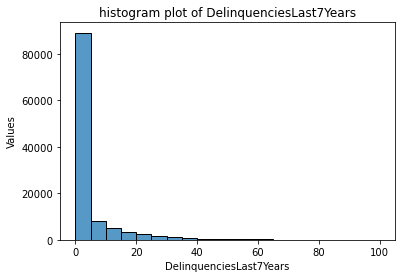

In [19]:
#####changing bin for deliquencienslast7 years and statedmonthlyincome
bins = np.arange(0,df_used_cols['DelinquenciesLast7Years'].max()+5,5)
histogram(df_used_cols,'DelinquenciesLast7Years',bins=bins) 

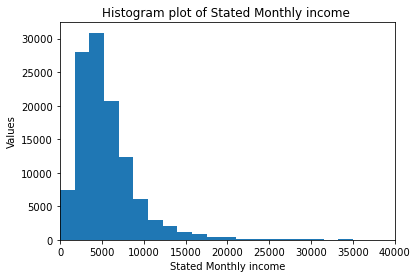

In [31]:
plt.hist(data=df_used_cols, x='StatedMonthlyIncome', bins=1000)
plt.xlim(0, 40000)
plt.xlabel('Stated Monthly income')
plt.ylabel('Values')
plt.title('Histogram plot of Stated Monthly income ');

it can be seen that, two variables are properly visualized. we can cleary see that there are left-skewed graph 



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Qualitative variables 

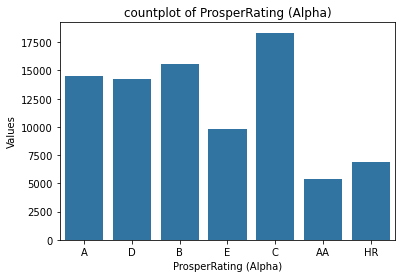

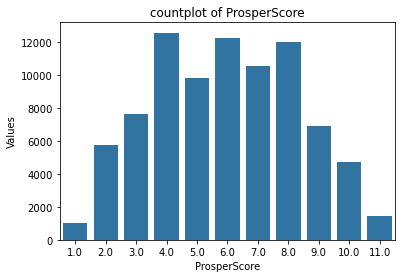

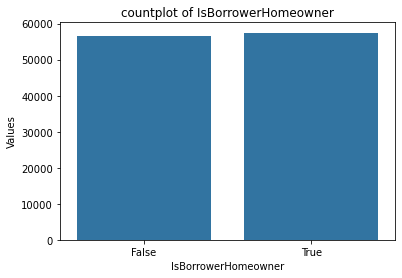

In [50]:
def countplot(df:pd.DataFrame,cols,rotation=0)->pd.DataFrame:
    """
    -- plot countplot for qualitative plot 
    """
    sb.countplot(data=df,x=cols,color=sb.color_palette()[0])
    plt.xlabel(cols)
    plt.ylabel('Values')
    plt.title(f'countplot of {cols}')
    plt.xticks(rotation=rotation)
    plt.show()
    

for i in ['ProsperRating (Alpha)','ProsperScore','IsBorrowerHomeowner']:
    countplot(df_used_cols,i)

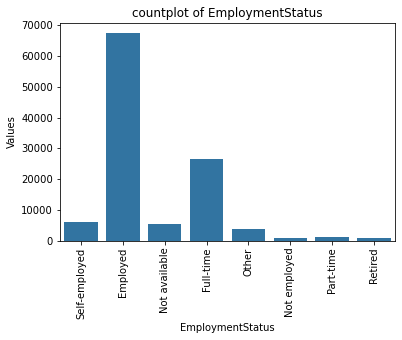

In [51]:
countplot(df_used_cols,'EmploymentStatus',rotation=90)

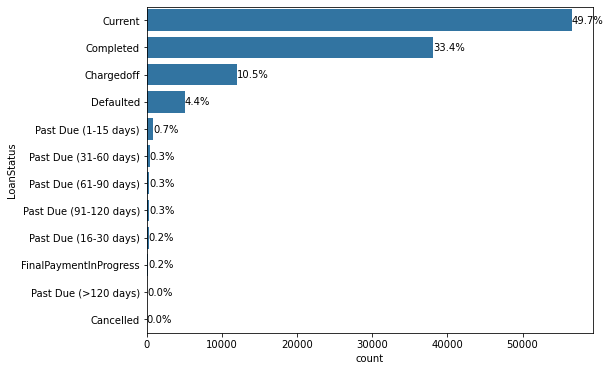

In [55]:
plt.figure(figsize=(8,6))
sb.countplot(data=df_used_cols,y='LoanStatus',color=sb.color_palette()[0],order=df_used_cols.LoanStatus.value_counts().index);

for i in range(df_used_cols.LoanStatus.value_counts().shape[0]):
    count = df_used_cols.LoanStatus.value_counts()[i]
    n_loan_status = df_used_cols['LoanStatus'].value_counts().sum()
    p_string = '{:0.1f}%'.format(100*count/n_loan_status)
    plt.text(count, i, p_string, va='center')

# Observation on Univariate Exploration 

The above visualization depicts distribution different features of the dataset. There are subdivided into two main categories which are quantitative and qualitative exploration of data. To begin with quantitative, histograms were used to analysis the distribution of nominal data. BorrowerAPR and BorrowerRate seem to have the same distribution and nearly normal distribution. With histograms, I realized some columns have wrong datatype such as ProsperScore and TotalProsperLoans and I changed their type. Also, some visualization were not clear and I used different bins and adjust the limit so that the graph can be clear.Features like DelinquenciesLast7Years and StatedMonthlyIncome seems to be left-skewed. 

continuing to qualitative 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

